<a href="https://colab.research.google.com/github/GauraoM/Machine-Learning-Tutorial-Python/blob/main/Logistic_Regression(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv("/content/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
left = df[df.left==1]
left.count(), left.shape

(satisfaction_level       3571
 last_evaluation          3571
 number_project           3571
 average_montly_hours     3571
 time_spend_company       3571
 Work_accident            3571
 left                     3571
 promotion_last_5years    3571
 Department               3571
 salary                   3571
 dtype: int64, (3571, 10))

In [9]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [11]:
# Take the mean of group of left column to select the column to be used 
df.groupby(df['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


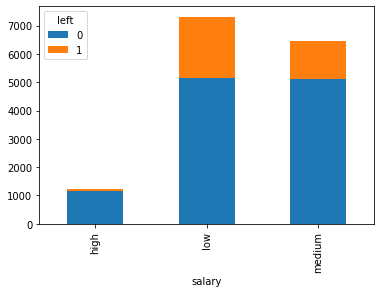

In [13]:
# Plot the graph of salary vs left
pd.crosstab(df.salary, df.left).plot(kind='bar',stacked=True)

#### From above we can choose "satisfaction_level, average_montly_hours,promotion_last_5years, salary" to perform logistic regression

In [15]:
sub_df = df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [16]:
# Get dummies for salary column
dummies = pd.get_dummies(df['salary'], prefix='salary')
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [17]:
# Concat with original dataframe
df_with_dummies = pd.concat([sub_df,dummies], axis=1)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [19]:
# Removing the column
df_with_dummies.drop('salary', axis=1, inplace = True)

In [22]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [23]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [25]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [26]:
# create object of logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
# Train
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Predict
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

In [29]:
# Check Accuracy
model.score(X_test,y_test)

0.7756666666666666